In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [50]:
# 加载数据集
df = pd.read_csv('./stock_dataset_2.csv')
df.describe

<bound method NDFrame.describe of      index_code        date     open    close      low     high       volume  \
0      sh000001  1990/12/20   104.30   104.39    99.98   104.39     197000.0   
1      sh000001  1990/12/21   109.07   109.13   103.73   109.13      28000.0   
2      sh000001  1990/12/24   113.57   114.55   109.13   114.55      32000.0   
3      sh000001  1990/12/25   120.09   120.25   114.55   120.25      15000.0   
4      sh000001  1990/12/26   125.27   125.27   120.25   125.27     100000.0   
...         ...         ...      ...      ...      ...      ...          ...   
6104   sh000001   2015/12/4  3558.15  3524.99  3510.41  3568.97  251736411.0   
6105   sh000001   2015/12/7  3529.81  3536.93  3506.62  3543.95  208302579.0   
6106   sh000001   2015/12/8  3518.65  3470.07  3466.79  3518.65  224367310.0   
6107   sh000001   2015/12/9  3462.58  3472.44  3454.88  3495.70  195698845.0   
6108   sh000001  2015/12/10  3469.81  3455.50  3446.27  3503.65  200427517.0   

     

In [51]:
df.head()

,index_code,date,open,close,low,high,volume,money,change,label
0,sh000001,1990/12/20,104.30,104.39,99.98,104.39,197000.0,85000.0,0.044109,109.13
1,sh000001,1990/12/21,109.07,109.13,103.73,109.13,28000.0,16100.0,0.045407,114.55
2,sh000001,1990/12/24,113.57,114.55,109.13,114.55,32000.0,31100.0,0.049666,120.25
3,sh000001,1990/12/25,120.09,120.25,114.55,120.25,15000.0,6500.0,0.049760,125.27
4,sh000001,1990/12/26,125.27,125.27,120.25,125.27,100000.0,53700.0,0.041746,125.28


In [52]:
# 特征选择
features = ['open', 'close', 'low', 'high', 'volume', 'money', 'change']
data = df[features]

In [53]:
import plotly.graph_objects as go
candlestick_trace = go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='Candlestick'
)
layout = go.Layout(
    title='Candlestick Chart',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price', rangemode='normal')
)

fig = go.Figure(data=[candlestick_trace], layout=layout)

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

In [54]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
data.shape

(6109, 7)

In [55]:
df.isna().sum().to_frame(name='num_of_NaN')

,num_of_NaN
index_code,0
date,0
open,0
close,0
low,0
high,0
volume,0
money,0
change,0
label,0


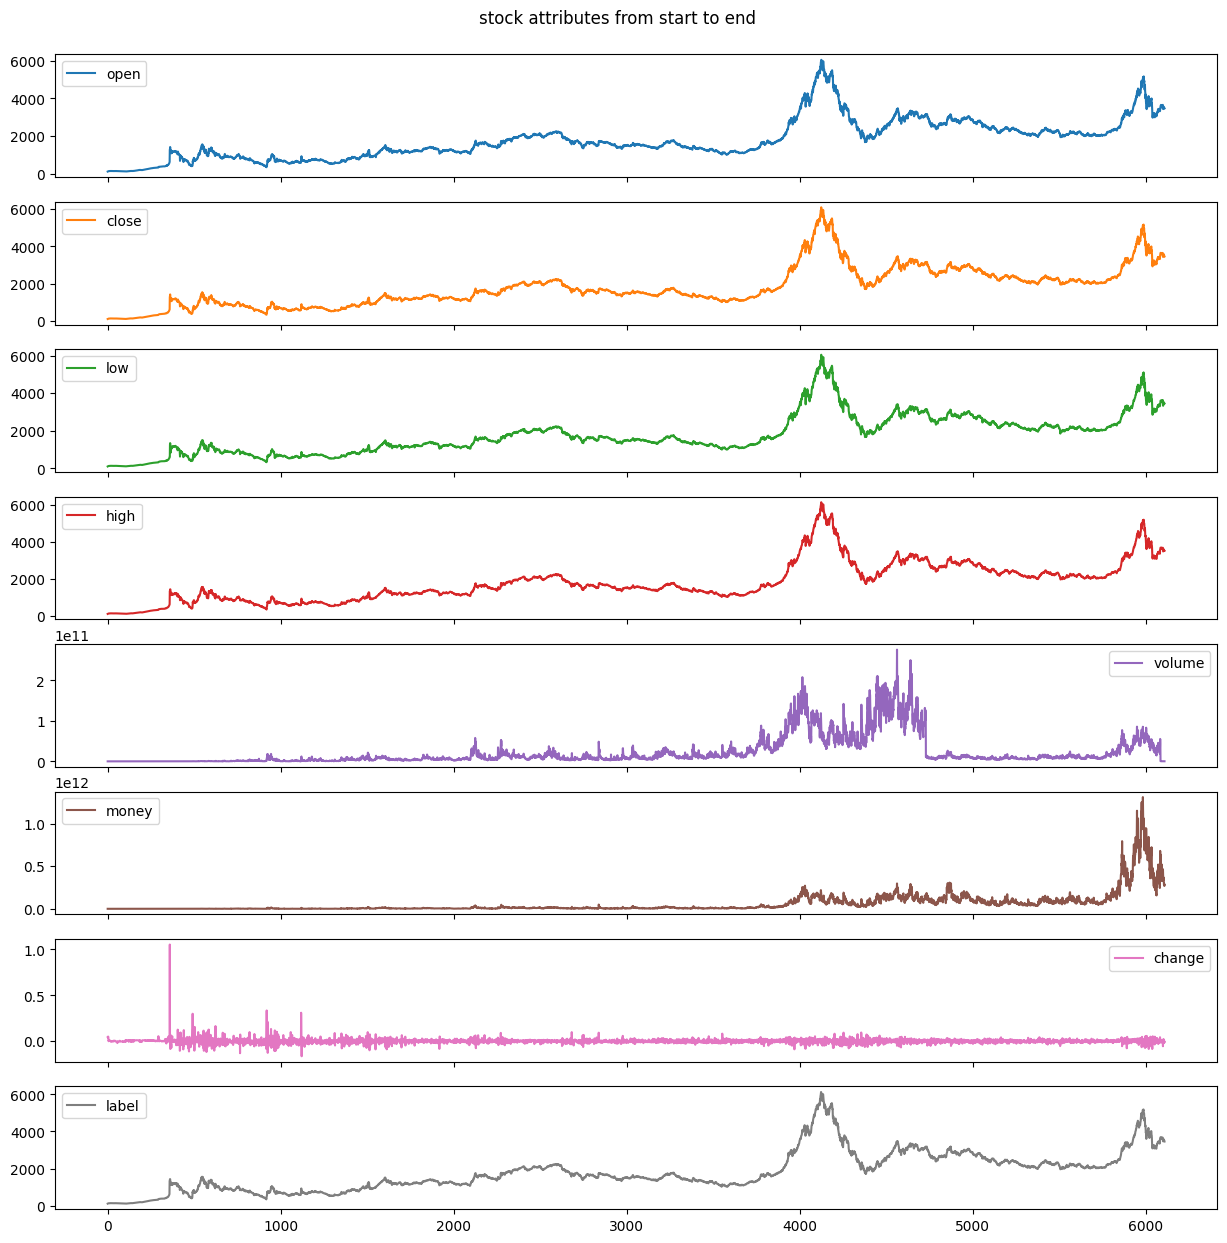

In [56]:
df.plot(subplots=True, figsize=(15, 15))
plt.suptitle('stock attributes from start to end', y=0.91)
plt.show()

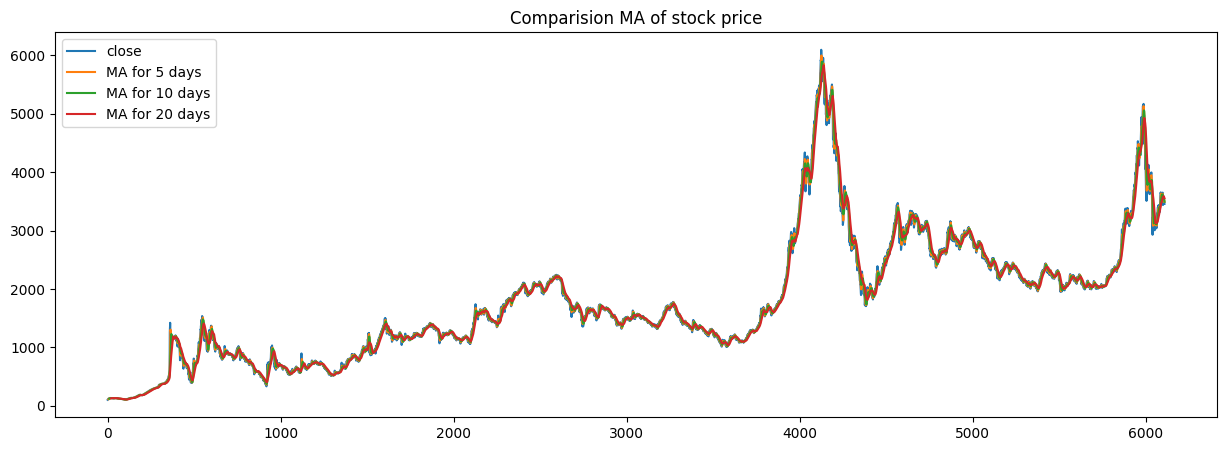

In [57]:
# 计算移动平均线
ma_day = [5, 10, 20]

for ma in ma_day:
    col_name = f'MA for {ma} days'
    df[col_name] = df['close'].rolling(ma).mean()

df[['close', 'MA for 5 days', 'MA for 10 days', 'MA for 20 days']].plot(figsize=(15,5))
plt.title('Comparision MA of stock price')
plt.show()

In [58]:
def split_data(stock, lookback):
    data_raw = stock
    data = []

    # 将data按lookback分组，data为长度为lookback的list
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])
	
    data = np.array(data)
    print(type(data))  
    # 按照8:2进行训练集、测试集划分
    test_set_size = int(np.round(0.2 * data.shape[0]))
    train_set_size = data.shape[0] - (test_set_size)

    x_train = data[:train_set_size, :-1, :]
    y_train = data[:train_set_size, -1, :]

    x_test = data[train_set_size:, :-1]
    y_test = data[train_set_size:, -1, :]

    return [x_train, y_train, x_test, y_test]

lookback = 10
x_train, y_train, x_test, y_test = split_data(data, lookback)
print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ', y_test.shape)

<class 'numpy.ndarray'>
x_train.shape =  (4879, 9, 7)
y_train.shape =  (4879, 7)
x_test.shape =  (1220, 9, 7)
y_test.shape =  (1220, 7)


In [59]:
# def split_data(stock, lookback, test_ratio=0.1, val_ratio=0.1):
#     data_raw = stock
#     data = []

#     for index in range(len(data_raw) - lookback):
#         data.append(data_raw[index: index + lookback])
    
#     data = np.array(data)
    
#     # 按照8:1:1进行训练集、验证集、测试集划分
#     total_size = data.shape[0]
#     val_set_size = int(np.round((1 - test_ratio - val_ratio) * total_size))
#     test_set_size = int(np.round(test_ratio * total_size))
#     val_test_set_size = total_size - val_set_size

#     x_train = data[:val_set_size, :-1, :]
#     y_train = data[:val_set_size, -1, :]
    
#     x_val = data[val_set_size:val_set_size + test_set_size, :-1]
#     y_val = data[val_set_size:val_set_size + test_set_size, -1]
    
#     x_test = data[val_set_size + test_set_size:, :-1]
#     y_test = data[val_set_size + test_set_size:, -1]

#     return [x_train, y_train, x_val, y_val, x_test, y_test]

# # 使用函数划分数据集
# lookback = 10
# x_train, y_train, x_val, y_val, x_test, y_test = split_data(data, lookback, test_ratio=0.1, val_ratio=0.1)
# print('x_train.shape = ', x_train.shape)
# print('y_train.shape = ', y_train.shape)
# print('x_val.shape = ', x_val.shape)
# print('y_val.shape = ', y_val.shape)
# print('x_test.shape = ', x_test.shape)
# print('y_test.shape = ', y_test.shape)

In [60]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
# x_val = torch.from_numpy(x_val).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
# 真实的数据
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
# y_val_lstm = torch.from_numpy(y_val).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
# y_val_gru = torch.from_numpy(y_val).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

# 输入的维度为features的数量
input_dim = len(features)
# 隐藏层特征的维度
hidden_dim = 32
# 循环的layers
num_layers = 2
# 预测多维度的数据
output_dim = len(features)
num_epochs = 10000


class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out



model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# lr_scheduler_lstm = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=4, factor=0.5)


In [61]:
loss_lstm = np.zeros(num_epochs)

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_lstm)
    print("Epoch ", t+1 , "MSE: ", loss.item())
    loss_lstm[t] = loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


predict1 = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))

original1 = pd.DataFrame(scaler.inverse_transform(y_train_lstm.detach().numpy()))


Epoch  1 MSE:  0.05204394459724426
Epoch  2 MSE:  0.030246688053011894
Epoch  3 MSE:  0.018766263499855995
Epoch  4 MSE:  0.023858007043600082
Epoch  5 MSE:  0.016807232052087784
Epoch  6 MSE:  0.013767590746283531
Epoch  7 MSE:  0.011812850832939148
Epoch  8 MSE:  0.008847055025398731
Epoch  9 MSE:  0.006691641639918089
Epoch  10 MSE:  0.004912722390145063
Epoch  11 MSE:  0.004250039346516132
Epoch  12 MSE:  0.0054968176409602165
Epoch  13 MSE:  0.004870545584708452
Epoch  14 MSE:  0.004050706047564745
Epoch  15 MSE:  0.0036684670485556126
Epoch  16 MSE:  0.003305883379653096
Epoch  17 MSE:  0.0032765534706413746
Epoch  18 MSE:  0.0034188413992524147
Epoch  19 MSE:  0.003405441530048847
Epoch  20 MSE:  0.0032399490009993315
Epoch  21 MSE:  0.0030856754165142775
Epoch  22 MSE:  0.002939363708719611
Epoch  23 MSE:  0.002681216225028038
Epoch  24 MSE:  0.002440937329083681
Epoch  25 MSE:  0.0024080437142401934
Epoch  26 MSE:  0.002425363752990961
Epoch  27 MSE:  0.0023322664201259613
Epo

In [62]:
# loss_lstm = np.zeros(num_epochs)

# for t in range(num_epochs):
#     model.train()
#     y_train_pred = model(x_train)

#     loss = criterion(y_train_pred, y_train_lstm)
#     print("Epoch ", t+1 , "MSE: ", loss.item())
#     loss_lstm[t] = loss.item()

#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
#     model.eval()
#     with torch.no_grad():
#         # 预测验证集数据
#         y_val_pred = model(x_val)
#         # 计算验证集损失
#         val_loss = criterion(y_val_pred, y_val_lstm)

#     # 更新学习率调度器
#     lr_scheduler_lstm.step(val_loss)

In [63]:
# 将模型设置为评估模式
model.eval()

# 禁用梯度计算，以减少内存消耗
with torch.no_grad():
    # 使用测试集数据进行预测
    y_test_pred = model(x_test)

# 计算测试集上的MSE
test_loss = criterion(y_test_pred, y_test_lstm)
print("Test MSE: ", test_loss.item())
print("RMSE: ", np.sqrt(test_loss.item()))

predict2 = pd.DataFrame(scaler.inverse_transform(y_test_pred.detach().numpy()))
original2 = pd.DataFrame(scaler.inverse_transform(y_test_lstm.detach().numpy()))

predict = pd.concat([predict1, predict2], axis=0, ignore_index=True)
original = pd.concat([original1, original2], axis=0, ignore_index=True)

Test MSE:  0.0014284651260823011
RMSE:  0.03779504102501149


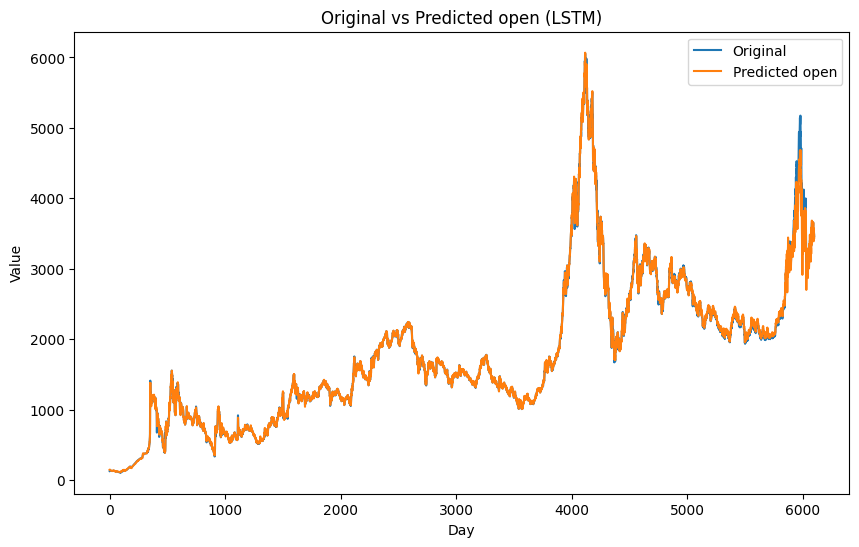

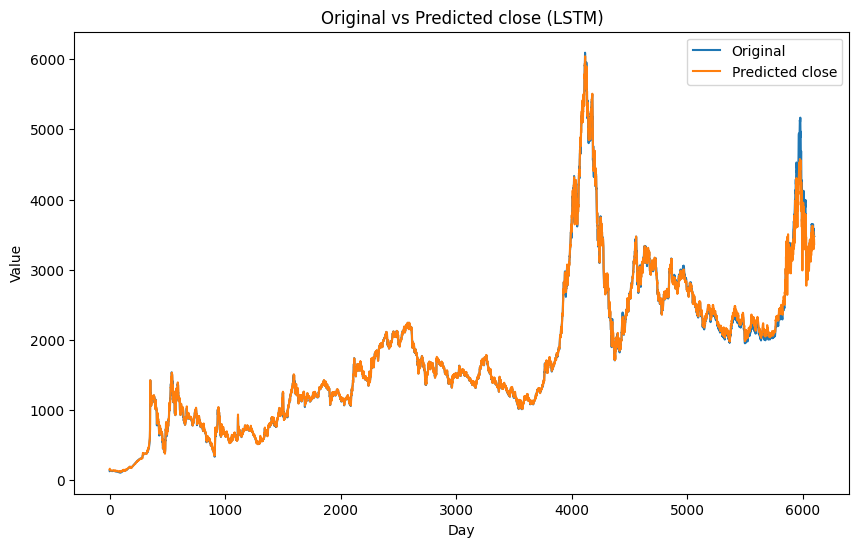

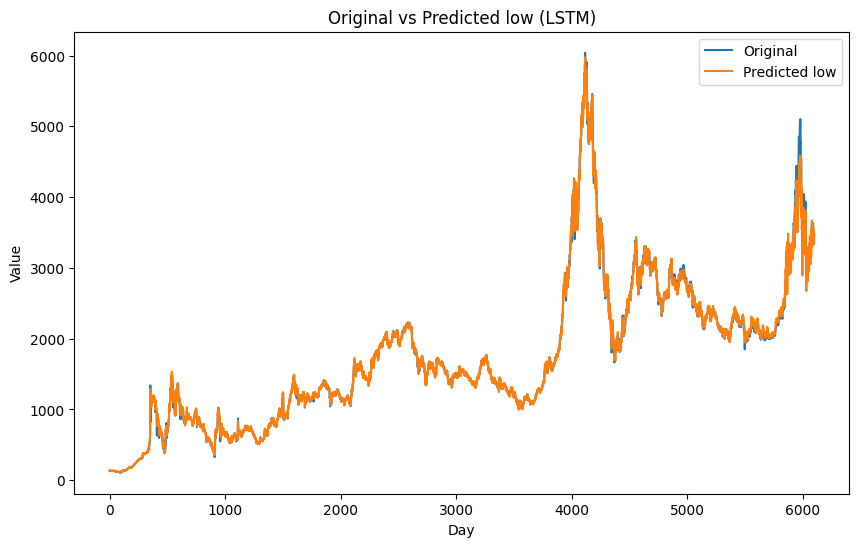

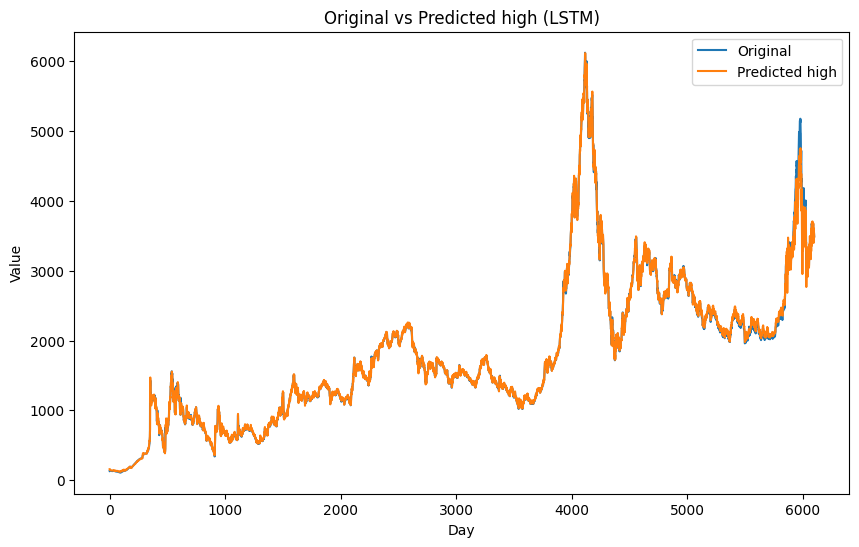

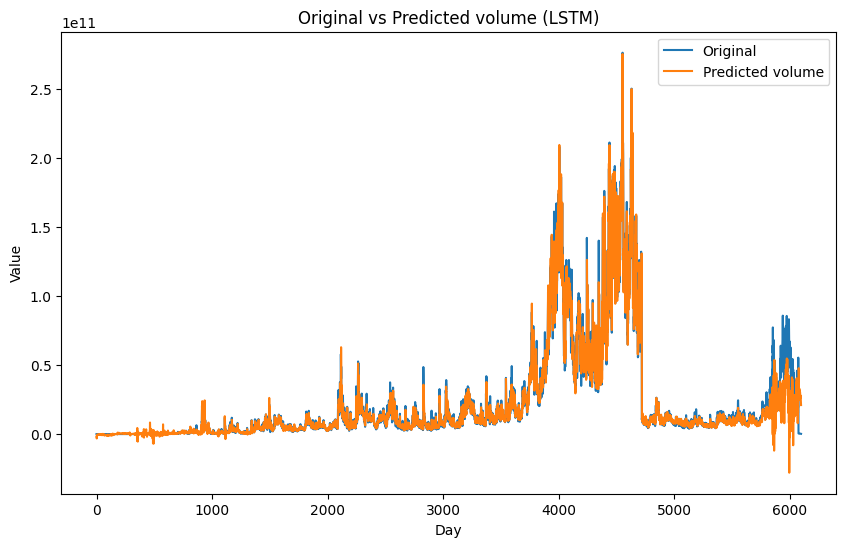

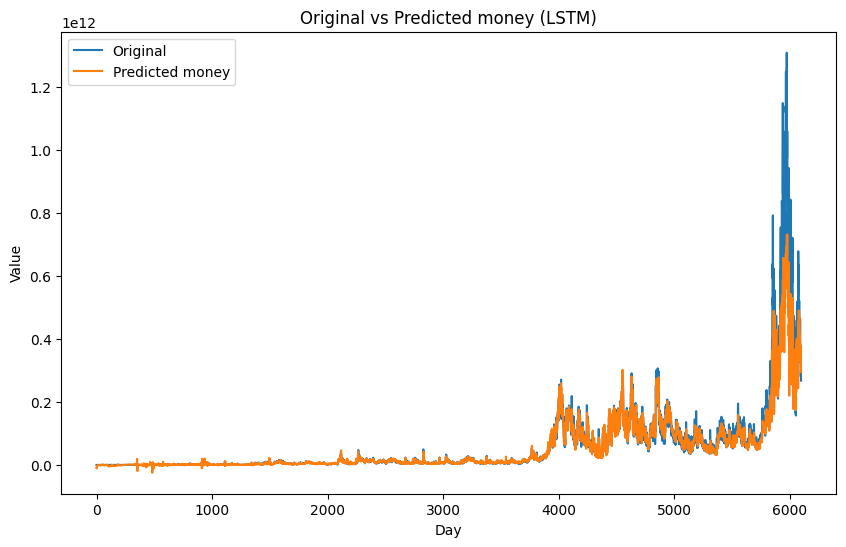

In [64]:
import matplotlib.pyplot as plt

# Plotting the original and predicted values for each index
pred_labels = ['Predicted open', 'Predicted close', 'Predicted low', 'Predicted high', 'Predicted volume', 'Predicted money'] 
for i in range(6):
    plt.figure(figsize=(10, 6))
    plt.plot(original[i], label='Original')
    plt.plot(predict[i], label=pred_labels[i])
    plt.title(f'Original vs Predicted {features[i]} (LSTM)')
    plt.xlabel('Day')
    plt.ylabel('Value')
    plt.legend()
    plt.show()



In [65]:
# import seaborn as sns
# sns.set_style("darkgrid")

# fig = plt.figure()
# fig.subplots_adjust(hspace=0.2, wspace=0.2)

# plt.subplot(1, 2, 1)
# ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
# ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (LSTM)", color='tomato')
# print(predict.index)
# print("aaaa")
# print(predict[0])


# ax.set_title('Stock price', size = 14, fontweight='bold')
# ax.set_xlabel("Days", size = 14)
# ax.set_ylabel("Cost (USD)", size = 14)
# ax.set_xticklabels('', size=10)


# plt.subplot(1, 2, 2)
# ax = sns.lineplot(data=loss_lstm, color='royalblue')
# ax.set_xlabel("Epoch", size = 14)
# ax.set_ylabel("Loss", size = 14)
# ax.set_title("Training Loss", size = 14, fontweight='bold')
# fig.set_figheight(6)
# fig.set_figwidth(16)
# plt.show()


In [66]:
import torch
import torch.nn as nn
import math


class TransformerModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, nhead, output_dim, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.nhead = nhead
        
        self.encoder = nn.Linear(input_dim, hidden_dim)
        self.pos_encoder = PositionalEncoding(hidden_dim, dropout)
        self.transformer_encoder = nn.TransformerEncoderLayer(
            d_model=hidden_dim, nhead=nhead, dim_feedforward=hidden_dim * 4, dropout=dropout, batch_first=True)
        self.transformer = nn.TransformerEncoder(self.transformer_encoder, num_layers=num_layers)
        self.decoder = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, src):
        src = self.encoder(src) * math.sqrt(self.hidden_dim)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src)
        output = self.decoder(output[:, -1, :])  
        return output

class PositionalEncoding(nn.Module):
    def __init__(self, hidden_dim, dropout=0.1):
        super(PositionalEncoding, self).__init__()
        self.hidden_dim = hidden_dim
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x):
        seq_length = x.size(0)
        pe = torch.zeros(seq_length, self.hidden_dim, device=x.device)
        position = torch.arange(0, seq_length, dtype=torch.float, device=x.device).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, self.hidden_dim, 2).float() * (-math.log(10000.0) / self.hidden_dim))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        
        x = x + pe[:x.size(0), :]
        return self.dropout(x)


In [67]:
transformer_model = TransformerModel(input_dim=input_dim, hidden_dim=hidden_dim, num_layers=num_layers, nhead=2, output_dim=output_dim)

# Redefine the optimizer for the transformer model
optimiser_transformer = torch.optim.Adam(transformer_model.parameters(), lr=0.01)

In [68]:
loss_transformer = np.zeros(num_epochs)

for t in range(num_epochs):
    y_train_pred = transformer_model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t+1 , "MSE: ", loss.item())
    loss_transformer[t] = loss.item()

    optimiser_transformer.zero_grad()
    loss.backward()
    optimiser_transformer.step()

predict1 = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))

original1 = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

Epoch  1 MSE:  0.2985723614692688
Epoch  2 MSE:  0.4702620506286621
Epoch  3 MSE:  0.1816059947013855
Epoch  4 MSE:  0.05945739522576332
Epoch  5 MSE:  0.08525063842535019
Epoch  6 MSE:  0.1022149994969368
Epoch  7 MSE:  0.07959623634815216
Epoch  8 MSE:  0.0457933209836483
Epoch  9 MSE:  0.02649718150496483
Epoch  10 MSE:  0.02736097015440464
Epoch  11 MSE:  0.03690486401319504
Epoch  12 MSE:  0.04080076888203621
Epoch  13 MSE:  0.036080680787563324
Epoch  14 MSE:  0.027101997286081314
Epoch  15 MSE:  0.01949247159063816
Epoch  16 MSE:  0.01649104803800583
Epoch  17 MSE:  0.01643528789281845
Epoch  18 MSE:  0.0185856930911541
Epoch  19 MSE:  0.020383495837450027
Epoch  20 MSE:  0.020381059497594833
Epoch  21 MSE:  0.018180759623646736
Epoch  22 MSE:  0.014583708718419075
Epoch  23 MSE:  0.012263450771570206
Epoch  24 MSE:  0.011369679123163223
Epoch  25 MSE:  0.011886466294527054
Epoch  26 MSE:  0.012209285981953144
Epoch  27 MSE:  0.01260362472385168
Epoch  28 MSE:  0.012352473102509

In [69]:
# 将模型设置为评估模式
transformer_model.eval()

# 禁用梯度计算，以减少内存消耗
with torch.no_grad():
    # 使用测试集数据进行预测
    y_test_pred = transformer_model(x_test)

# 计算测试集上的MSE
test_loss = criterion(y_test_pred, y_test_gru)
print("Test MSE: ", test_loss.item())
print("RMSE: ", np.sqrt(test_loss.item()))

predict2 = pd.DataFrame(scaler.inverse_transform(y_test_pred.detach().numpy()))
original2 = pd.DataFrame(scaler.inverse_transform(y_test_gru.detach().numpy()))

predict = pd.concat([predict1, predict2], axis=0, ignore_index=True)
original = pd.concat([original1, original2], axis=0, ignore_index=True)

Test MSE:  0.003278822638094425
RMSE:  0.057261004515240785


In [70]:
# import matplotlib.pyplot as plt

# # Plotting the data
# plt.plot(original.index, original[0], label="Original Price", color='red')
# plt.plot(predict.index, predict[0], label="Prediction Price(Transformer)", color='blue')

# # Adding labels and title
# plt.title('Stock Price By Time (Transformer)')
# plt.xlabel('Days')
# plt.ylabel('Price')

# # Displaying the legend
# plt.legend()

# # Displaying the plot
# plt.show()

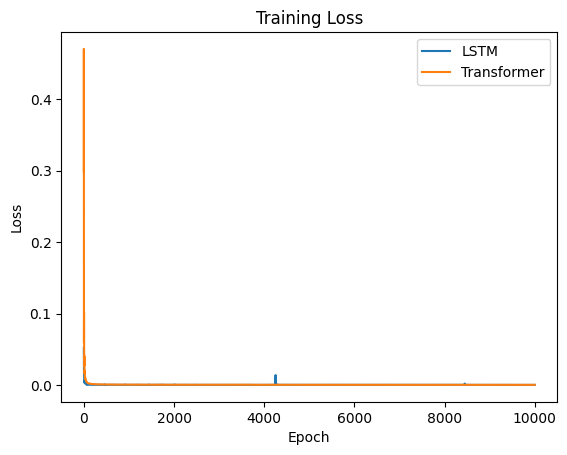

In [71]:
import matplotlib.pyplot as plt

# Plotting the training loss
plt.plot(loss_lstm, label='LSTM')
plt.plot(loss_transformer, label='Transformer')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

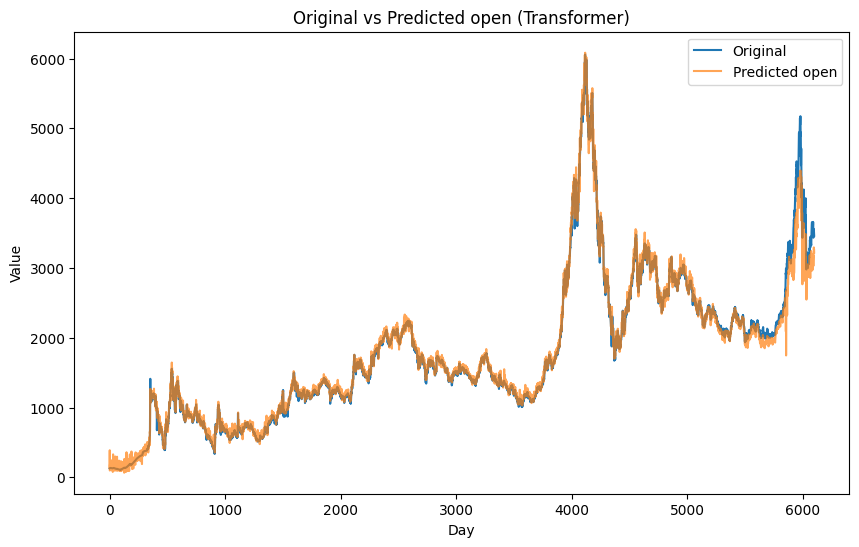

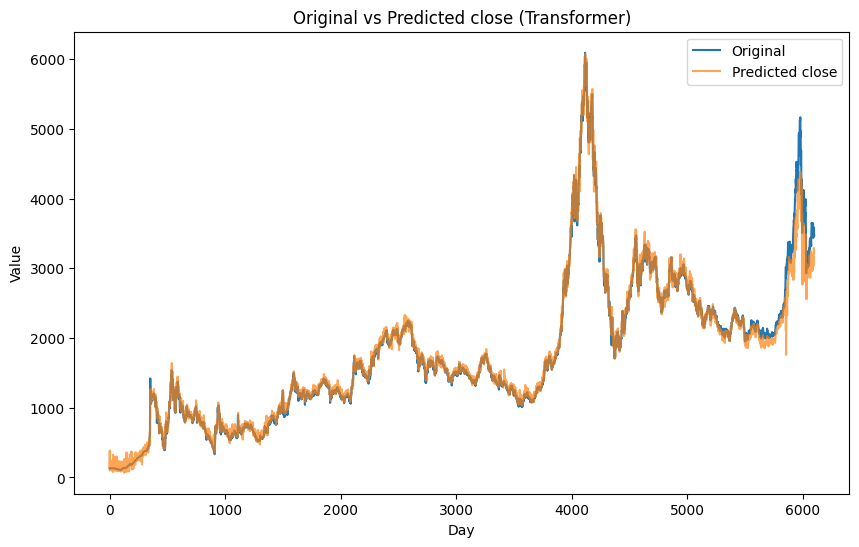

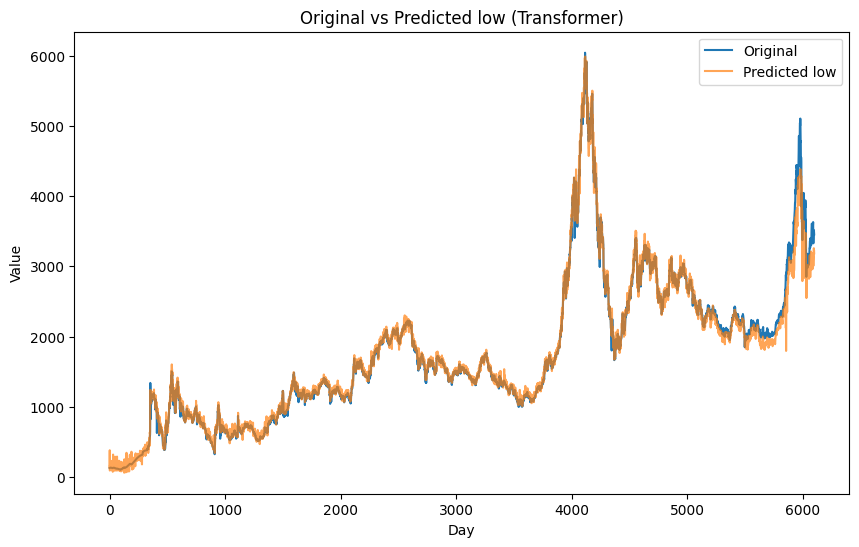

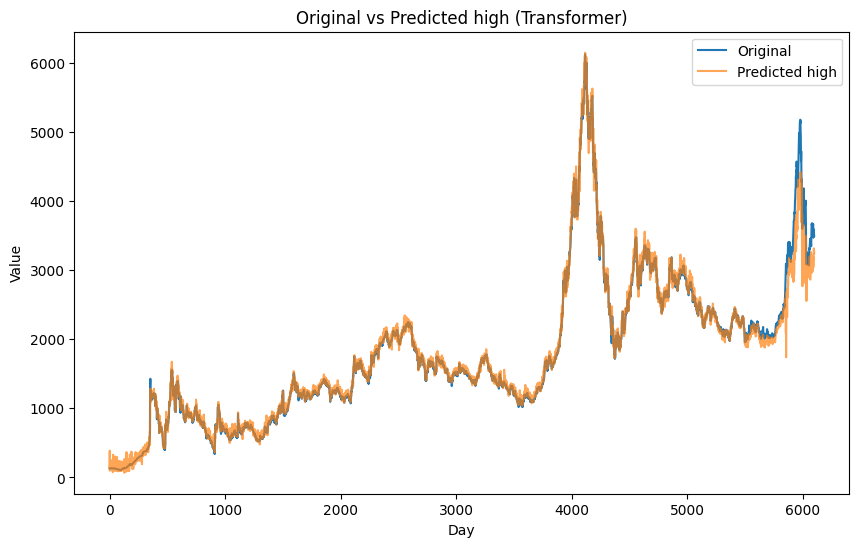

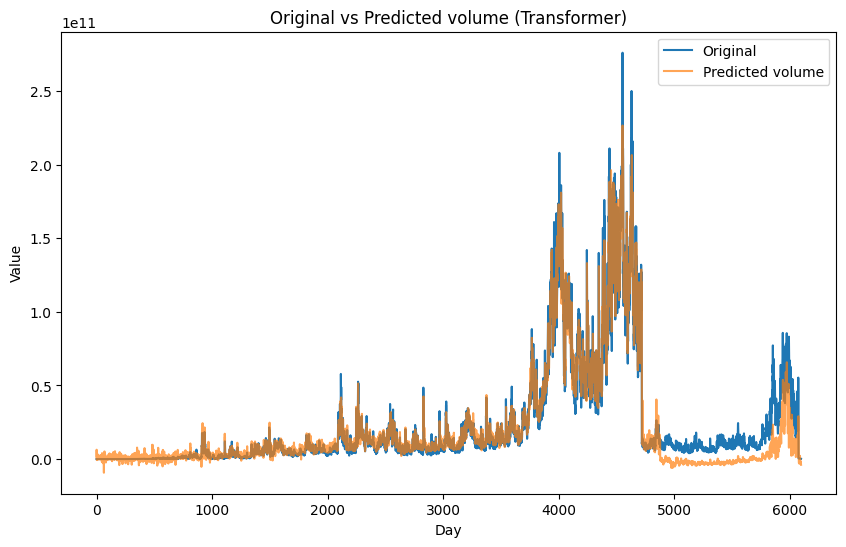

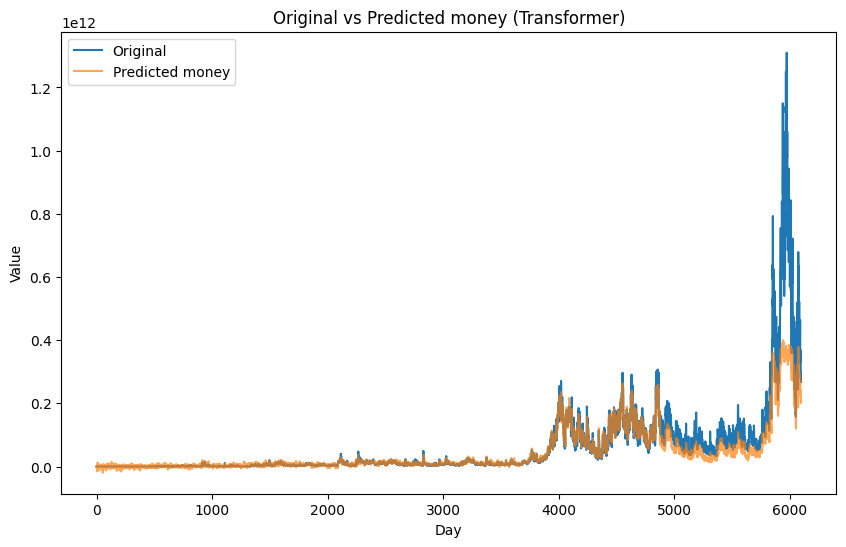

In [72]:
import matplotlib.pyplot as plt

# Plotting the original and predicted values for each index
pred_labels = ['Predicted open', 'Predicted close', 'Predicted low', 'Predicted high', 'Predicted volume', 'Predicted money'] 
for i in range(6):
    plt.figure(figsize=(10, 6))
    plt.plot(original[i], label='Original')
    plt.plot(predict[i], label=pred_labels[i], alpha=0.7)
    plt.title(f'Original vs Predicted {features[i]} (Transformer)')
    plt.xlabel('Day')
    plt.ylabel('Value')
    plt.legend()
    plt.show()